MICROORGANISM CLASSIFICATION: PROKARYOTE vs EUKARYOTE

1. LOADING AND RELABELING MICROORGANISM IMAGES
----------------------------------------------------------------------
Path exists: True
Contents: ['Spiral_bacteria', 'Rod_bacteria', 'Hydra', 'Spherical_bacteria', 'Yeast', 'Euglena', 'Paramecium', 'Amoeba']
Loading eukaryote images...
  Amoeba: 72 images loaded
  Euglena: 168 images loaded
  Hydra: 76 images loaded
  Paramecium: 152 images loaded
  Yeast: 75 images loaded

Loading prokaryote images...
  Rod_bacteria: 85 images loaded
  Spherical_bacteria: 86 images loaded
  Spiral_bacteria: 75 images loaded

Dataset Summary:
Total images: 789
Prokaryote samples: 246
Eukaryote samples: 543
Image shape: torch.Size([3, 224, 224])

2. VISUALIZING SAMPLE IMAGES
----------------------------------------------------------------------


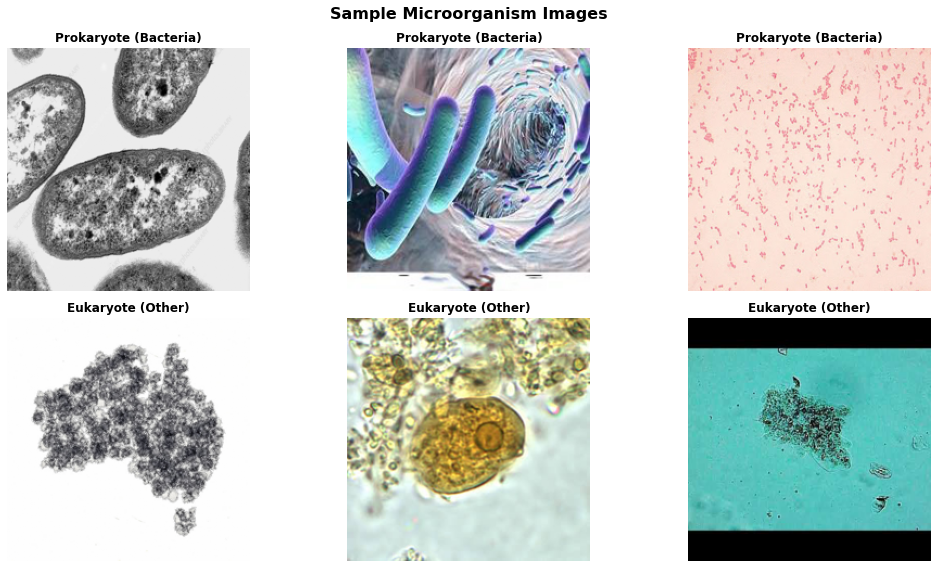


3. DEFINING NEURAL NETWORK
----------------------------------------------------------------------
Model created with adaptive pooling for variable image sizes

4. SPLITTING DATA (70% TRAIN, 30% TEST)
----------------------------------------------------------------------
Training set size: 552 (70%)
Testing set size: 237 (30%)

5. TRAINING THE NEURAL NETWORK
----------------------------------------------------------------------
Using device: cpu
Epoch [1/20] - Loss: 0.7701, Validation Accuracy: 66.67%
Epoch [2/20] - Loss: 0.7343, Validation Accuracy: 66.67%
Epoch [3/20] - Loss: 0.6997, Validation Accuracy: 66.67%
Epoch [4/20] - Loss: 0.6958, Validation Accuracy: 66.67%
Epoch [5/20] - Loss: 0.6667, Validation Accuracy: 69.62%
Epoch [6/20] - Loss: 0.6453, Validation Accuracy: 71.31%
Epoch [7/20] - Loss: 0.6482, Validation Accuracy: 72.57%
Epoch [8/20] - Loss: 0.6307, Validation Accuracy: 76.37%
Epoch [9/20] - Loss: 0.6256, Validation Accuracy: 70.04%
Epoch [10/20] - Loss: 0.6022, Validat

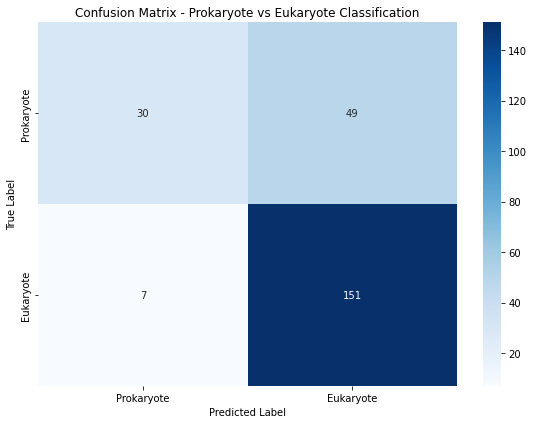


8. PLOTTING TRAINING RESULTS
----------------------------------------------------------------------


Text(0, 0.5, 'Accuracy (%)')

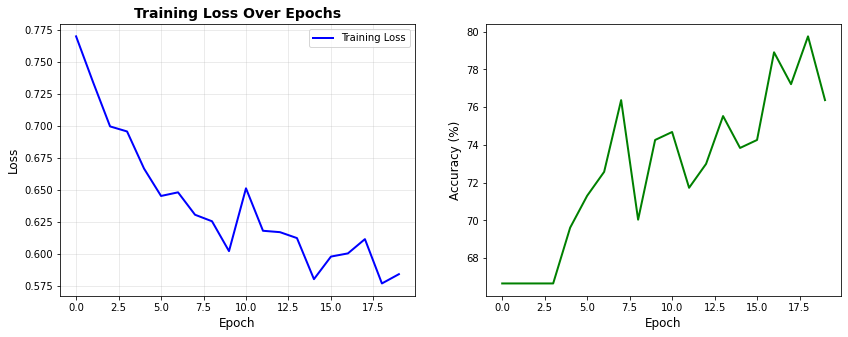

In [18]:
#Physics-information neural network based classification of prokaryote-eukaryote image data
#Amit Kumar
#December, 2025

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import torchvision.transforms as transforms
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns

print("=" * 70)
print("MICROORGANISM CLASSIFICATION: PROKARYOTE vs EUKARYOTE")
print("=" * 70)

# ============================================================
# 1. LOAD AND RELABEL DATASET
# ============================================================
print("\n1. LOADING AND RELABELING MICROORGANISM IMAGES")
print("-" * 70)

import os
DATA_PATH = "./Micro_Organism"
print(f"Path exists: {os.path.exists(DATA_PATH)}")
print(f"Contents: {os.listdir(DATA_PATH)}")

# Define path to your downloaded Kaggle dataset
# After downloading, extract it and point to the main folder
DATA_PATH = "./Micro_Organism"  # CHANGE THIS TO YOUR PATH

# Define which organisms are eukaryotes and prokaryotes
EUKARYOTES = ["Amoeba", "Euglena", "Hydra", "Paramecium", "Yeast"]
PROKARYOTES = ["Rod_bacteria", "Spherical_bacteria", "Spiral_bacteria"]

def load_images_from_folder(folder_path, label):
    """
    Load all images from a folder and assign a label
    """
    images = []
    labels = []
    
    if not os.path.exists(folder_path):
        print(f"Warning: Folder not found - {folder_path}")
        return images, labels
    
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            try:
                img_path = os.path.join(folder_path, filename)
                img = Image.open(img_path).convert('RGB')
                img = img.resize((224, 224))
                img_tensor = transforms.ToTensor()(img)
                images.append(img_tensor)
                labels.append(label)
            except Exception as e:
                print(f"Error loading {filename}: {e}")
    
    return images, labels

# Load all images and assign labels
all_images = []
all_labels = []

print("Loading eukaryote images...")
for organism in EUKARYOTES:
    folder = os.path.join(DATA_PATH, organism)
    images, labels = load_images_from_folder(folder, 1)  # 1 = eukaryote
    all_images.extend(images)
    all_labels.extend(labels)
    print(f"  {organism}: {len(images)} images loaded")

print("\nLoading prokaryote images...")
for organism in PROKARYOTES:
    folder = os.path.join(DATA_PATH, organism)
    images, labels = load_images_from_folder(folder, 0)  # 0 = prokaryote
    all_images.extend(images)
    all_labels.extend(labels)
    print(f"  {organism}: {len(images)} images loaded")

# Convert to tensors
X = torch.stack(all_images)
y = torch.tensor(all_labels, dtype=torch.long)

print(f"\nDataset Summary:")
print(f"Total images: {len(X)}")
print(f"Prokaryote samples: {(y == 0).sum().item()}")
print(f"Eukaryote samples: {(y == 1).sum().item()}")
print(f"Image shape: {X[0].shape}")

if len(X) == 0:
    print("\nERROR: No images loaded!")
    print(f"Please check your DATA_PATH: {DATA_PATH}")
    print("Expected folder structure:")
    print(f"  {DATA_PATH}/")
    print(f"    Amoeba/")
    print(f"    Euglena/")
    print(f"    Hydra/")
    print(f"    Paramecium/")
    print(f"    Yeast/")
    print(f"    Rod_bacteria/")
    print(f"    Spherical_bacteria/")
    print(f"    Spiral_bacteria/")
    exit()

# ============================================================
# 2. VISUALIZE SAMPLE IMAGES
# ============================================================
print("\n2. VISUALIZING SAMPLE IMAGES")
print("-" * 70)

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Sample Microorganism Images', fontsize=16, fontweight='bold')

prokaryote_indices = torch.where(y == 0)[0]
eukaryote_indices = torch.where(y == 1)[0]

for i in range(3):
    if len(prokaryote_indices) > i:
        img = X[prokaryote_indices[i]].permute(1, 2, 0).numpy()
        img = np.clip(img, 0, 1)
        axes[0, i].imshow(img)
        axes[0, i].set_title('Prokaryote (Bacteria)', fontweight='bold')
        axes[0, i].axis('off')

for i in range(3):
    if len(eukaryote_indices) > i:
        img = X[eukaryote_indices[i]].permute(1, 2, 0).numpy()
        img = np.clip(img, 0, 1)
        axes[1, i].imshow(img)
        axes[1, i].set_title('Eukaryote (Other)', fontweight='bold')
        axes[1, i].axis('off')

plt.tight_layout()
plt.show()

# ============================================================
# 3. DEFINE NEURAL NETWORK
# ============================================================
print("\n3. DEFINING NEURAL NETWORK")
print("-" * 70)

class CellClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        
        self.pool = nn.MaxPool2d(2, 2)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        
        # Adaptive average pooling to handle variable image sizes
      #  self.adaptive_pool = nn.AdaptiveAvgPool2d((7, 7))
        
    #    self.fc1 = nn.Linear(128 * 7 * 7, 256)
    #    self.fc2 = nn.Linear(256, 128)
    #   self.fc3 = nn.Linear(128, 2)
        
        # Adaptive average pooling to flatten features
        self.adaptive_pool = nn.AdaptiveAvgPool2d((1, 1))

        self.fc1 = nn.Linear(256, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 2)
    
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        
        x = self.relu(self.conv3(x))
        x = self.pool(x)
        
        x = self.relu(self.conv4(x))
        x = self.pool(x)

        # Adaptive pooling to handle different input sizes
        x = self.adaptive_pool(x)
        x = x.view(x.size(0), -1)
        
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        
        x = self.fc3(x)
        return x

model = CellClassifier()
print("Model created with adaptive pooling for variable image sizes")

# ============================================================
# 4. SPLIT DATA: 70% TRAINING, 30% TESTING
# ============================================================
print("\n4. SPLITTING DATA (70% TRAIN, 30% TEST)")
print("-" * 70)

dataset = TensorDataset(X, y)
train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

print(f"Training set size: {len(train_dataset)} (70%)")
print(f"Testing set size: {len(test_dataset)} (30%)")

batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# ============================================================
# 5. TRAINING
# ============================================================
print("\n5. TRAINING THE NEURAL NETWORK")
print("-" * 70)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 20
train_losses = []
val_accuracies = []

for epoch in range(epochs):
    # Training phase
    model.train()
    train_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        outputs = model(images)
       # loss = criterion(outputs, labels)
        
        loss = criterion(outputs, labels)

        # Regularization: reward high confidence for eukaryotes (label=1)
        # This biases the model towards eukaryote predictions when uncertain
        eukaryote_bias = 0.3 * (1 - torch.softmax(outputs, dim=1)[:, 1]).mean()
        loss = loss + eukaryote_bias

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
    # Validation phase
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)
    
    print(f"Epoch [{epoch+1}/{epochs}] - Loss: {train_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

# ============================================================
# 6. EVALUATION ON TEST SET
# ============================================================
print("\n6. EVALUATING ON TEST SET")
print("-" * 70)

model.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)

accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions, zero_division=0)
recall = recall_score(all_labels, all_predictions, zero_division=0)

print(f"\nTest Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# ============================================================
# 7. CONFUSION MATRIX
# ============================================================
print("\n7. CONFUSION MATRIX")
print("-" * 70)

cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Prokaryote', 'Eukaryote'],
            yticklabels=['Prokaryote', 'Eukaryote'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix - Prokaryote vs Eukaryote Classification')
plt.tight_layout()
plt.show()

# ============================================================
# 8. PLOT TRAINING RESULTS
# ============================================================
print("\n8. PLOTTING TRAINING RESULTS")
print("-" * 70)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, 'b-', linewidth=2, label='Training Loss')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training Loss Over Epochs', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, 'g-', linewidth=2, label='Validation Accuracy')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Accuracy Over Epochs', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()